# Convolutional Neural Network

### Packages

In [11]:
# ----- Tensorflow -----
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import regularizers as reg
from keras import optimizers as opt
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

from keras.layers import Input, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Concatenate, AveragePooling2D, SpatialDropout2D

from stn import STN

# ----- plot -----
import matplotlib.pyplot as plt

# ----- Utility functions -----
from utils import load_data, plot_hist



In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Load Data

In [12]:
tf.random.set_seed(88)


data_dir = 'C:/Users/chrse/Desktop/project_aml'
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=1, batch_size=BATCH_SIZE)

### Architectures
- Consider and discuss alternative CNN model architectures

----------------------------------------------------------------

AlexNet - Original

In [17]:
# ----- AlexNet - Original -----
#
inputs = Input(shape=(96,96,3))

a1 = Conv2D(filters=55, kernel_size=11, activation='relu')(inputs)
a1 = Conv2D(filters=128, kernel_size=3, activation='relu')(a1)
a1 = MaxPooling2D((3, 3) )(a1)

b1 = Conv2D(filters=55, kernel_size=11, activation='relu')(inputs)
b1 = Conv2D(filters=128, kernel_size=3, activation='relu')(b1)
b1 = MaxPooling2D((3, 3) )(b1)

conc1 = Concatenate()([a1,b1])

a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(conc1)
a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(a2)
a2 = MaxPooling2D((3, 3) )(a2)

b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(conc1)
b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(b2)
b2 = MaxPooling2D((3, 3) )(b2)

conc2 = Concatenate()([a2,b2])

x = Flatten()(conc2)

x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002), # Learning rate sat ned
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 50, validation_data= val)



Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_32 (Conv2D)             (None, 86, 86, 55)   20020       ['input_5[0][0]']                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 86, 86, 55)   20020       ['input_5[0][0]']                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 84, 84, 128)  63488       ['conv2d_32[0][0]']              
                                                                                            

AlexNet - Original - Reduced parameters 1

In [ ]:
# ----- AlexNet - Original - Reduced parameters 1 -----
#
inputs = Input(shape=(96,96,3))

a1 = Conv2D(filters=32, kernel_size=11, activation='relu')(inputs)
a1 = Conv2D(filters=64, kernel_size=3, activation='relu')(a1)
a1 = MaxPooling2D((3, 3) )(a1)

b1 = Conv2D(filters=32, kernel_size=11, activation='relu')(inputs)
b1 = Conv2D(filters=64, kernel_size=3, activation='relu')(b1)
b1 = MaxPooling2D((3, 3) )(b1)

conc1 = Concatenate()([a1,b1])

a2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(a2)
a2 = MaxPooling2D((3, 3) )(a2)

b2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(b2)
b2 = MaxPooling2D((3, 3) )(b2)

conc2 = Concatenate()([a2,b2])

x = Flatten()(conc2)

x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002), # Learning rate sat ned
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 50, validation_data= val)

AlexNet - Original - Reduced parameters 2

In [ ]:
# ----- AlexNet - Original - Reduced parameters 2 -----
#
inputs = Input(shape=(96,96,3))

a1 = Conv2D(filters=16, kernel_size=11, activation='relu')(inputs)
a1 = Conv2D(filters=32, kernel_size=3, activation='relu')(a1)
a1 = MaxPooling2D((3, 3) )(a1)

b1 = Conv2D(filters=16, kernel_size=11, activation='relu')(inputs)
b1 = Conv2D(filters=32, kernel_size=3, activation='relu')(b1)
b1 = MaxPooling2D((3, 3) )(b1)

conc1 = Concatenate()([a1,b1])

a2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(a2)
a2 = MaxPooling2D((3, 3) )(a2)

b2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(b2)
b2 = MaxPooling2D((3, 3) )(b2)

conc2 = Concatenate()([a2,b2])

x = Flatten()(conc2)

x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002), # Learning rate sat ned
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 50, validation_data= val)

AlexNet - Original - Bottleneck 1

In [ ]:
# ----- AlexNet - Original - Bottleneck 1 -----
#
inputs = Input(shape=(96,96,3))

a1 = Conv2D(filters=55, kernel_size=11, activation='relu')(inputs)
a1 = Conv2D(filters=128, kernel_size=3, activation='relu')(a1)
a1 = MaxPooling2D((3, 3) )(a1)

b1 = Conv2D(filters=55, kernel_size=11, activation='relu')(inputs)
b1 = Conv2D(filters=128, kernel_size=3, activation='relu')(b1)
b1 = MaxPooling2D((3, 3) )(b1)

conc1 = Concatenate()([a1,b1])

a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(conc1)
a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(a2)
a2 = MaxPooling2D((3, 3) )(a2)

b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(conc1)
b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(b2)
b2 = MaxPooling2D((3, 3) )(b2)

conc2 = Concatenate()([a2,b2])

x = Flatten()(conc2)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

x = Dense(8, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002), # Learning rate sat ned
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 50, validation_data= val)

AlexNet - Original - Bottleneck 2

In [ ]:
# ----- AlexNet - Original - Bottleneck 2 -----
#
inputs = Input(shape=(96,96,3))

a1 = Conv2D(filters=32, kernel_size=11, activation='relu')(inputs)
a1 = Conv2D(filters=64, kernel_size=3, activation='relu')(a1)
a1 = MaxPooling2D((3, 3) )(a1)

b1 = Conv2D(filters=32, kernel_size=11, activation='relu')(inputs)
b1 = Conv2D(filters=64, kernel_size=3, activation='relu')(b1)
b1 = MaxPooling2D((3, 3) )(b1)

conc1 = Concatenate()([a1,b1])

a2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
a2 = Conv2D(filters=128, kernel_size=6, activation='relu')(a2)
a2 = MaxPooling2D((3, 3) )(a2)

b2 = Conv2D(filters=64, kernel_size=6, activation='relu')(conc1)
b2 = Conv2D(filters=128, kernel_size=6, activation='relu')(b2)
b2 = MaxPooling2D((3, 3) )(b2)

conc2 = Concatenate()([a2,b2])

x = Flatten()(conc2)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='relu')(x)

x = Dense(8, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)


model.summary()

# ----- Configure model -----
model.compile(optimizer=opt.Nadam(learning_rate=0.00002), # Learning rate sat ned
	loss='categorical_crossentropy',
	metrics=['accuracy'])

# ----- Train model -----
history = model.fit(train, epochs = 50, validation_data= val)

Plot model

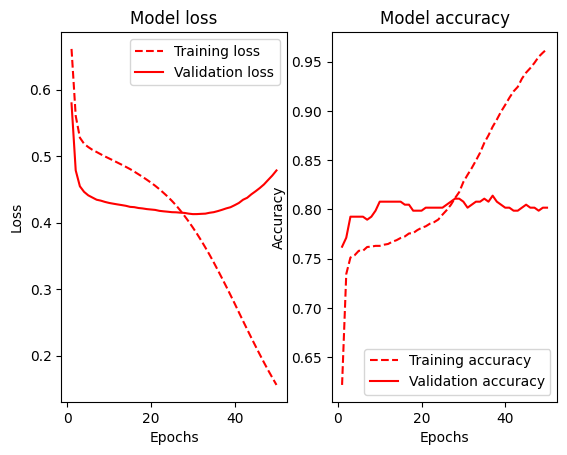

In [21]:
history_dict = history.history


# Plot 1 values
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


# Plot 2 values
train_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(train_loss_values) + 1)


# Plot 1
plt.subplot(1,2,1)
plt.plot(epochs, train_loss_values, 'r--', label='Training loss') # 'bo' is for blue dot, 'b' is for solid blue line
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot 2
plt.subplot(1,2,2)
plt.plot(epochs, train_acc_values, 'r--', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

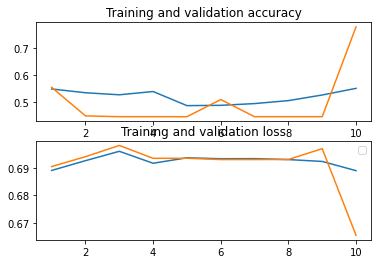

In [11]:
plot_hist(history)